In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

In [3]:
train_dir = 'train'
valid_dir = 'test'
test_dir  = 'test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(75,75),
                                                    batch_size=8,
                                                    class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(75,75),
                                                    batch_size=8,
                                                    class_mode='categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (8, 75, 75, 3)
배치 레이블 크기: (8, 27)


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(75,75,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(27,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
Hist_dandc=model.fit(train_generator,steps_per_epoch=62,epochs=200,validation_data=valid_generator,validation_steps=22)

Epoch 1/200
62/62 [==============================] - 1s 15ms/step - loss: 2.7023e-05 - accuracy: 1.0000 - val_loss: 5.0926 - val_accuracy: 0.5909
Epoch 2/200
62/62 [==============================] - 1s 15ms/step - loss: 1.7322e-05 - accuracy: 1.0000 - val_loss: 5.1055 - val_accuracy: 0.5966
Epoch 3/200
62/62 [==============================] - 1s 15ms/step - loss: 1.7188e-05 - accuracy: 1.0000 - val_loss: 5.2313 - val_accuracy: 0.5909
Epoch 4/200
62/62 [==============================] - 1s 15ms/step - loss: 1.1722e-05 - accuracy: 1.0000 - val_loss: 5.2873 - val_accuracy: 0.5909
Epoch 5/200
62/62 [==============================] - 1s 15ms/step - loss: 1.1331e-05 - accuracy: 1.0000 - val_loss: 5.3232 - val_accuracy: 0.5909
Epoch 6/200
62/62 [==============================] - 1s 15ms/step - loss: 9.3854e-06 - accuracy: 1.0000 - val_loss: 5.3687 - val_accuracy: 0.5909
Epoch 7/200
62/62 [==============================] - 1s 15ms/step - loss: 8.4030e-06 - accuracy: 1.0000 - val_loss: 5.4137 -

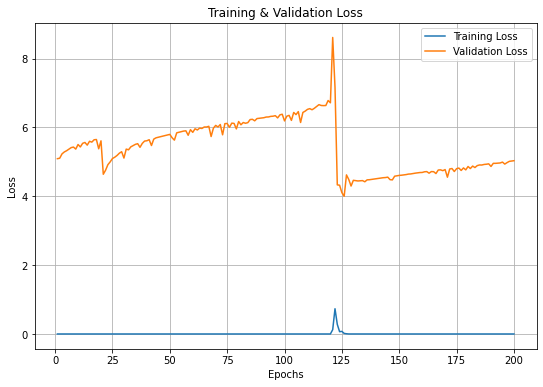

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

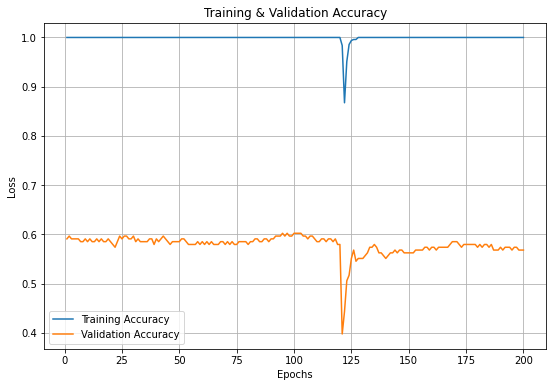

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(train_dir,
                                                    target_size=(75,75),
                                                    batch_size=8,
                                                    class_mode='categorical')

Found 498 images belonging to 27 classes.


In [21]:
loss,accuracy = model.evaluate(test_generator,steps=22)

22/22 [==============================] - 0s 11ms/step - loss: 5.6557e-07 - accuracy: 1.0000


In [22]:
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.00000
Accuracy = 1.00000
